In [1]:
from loader import loadData
import pandas as pd
import matplotlib.pyplot as plt



Load the data

In [2]:
df = loadData()

Look at the data


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


TASK 2 USER OVERVIEW ANALYSIS   

Top 10 Handsets

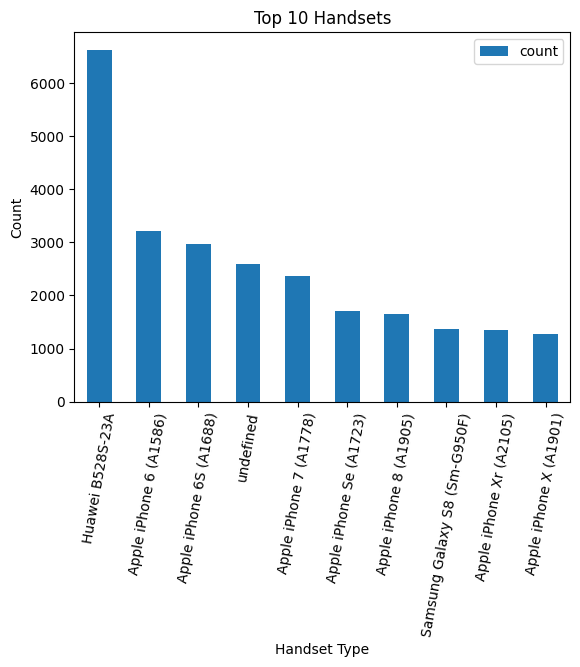

In [4]:

value_counts = df['Handset Type'].value_counts()[:10]
top_10_handsets = value_counts.index.tolist()
#print(value_counts)
#print(top_10_handsets)

top_10_df = pd.DataFrame(value_counts)
top_10_df.plot(kind= 'bar',rot=80)
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Top 10 Handsets')
plt.show(10)





The top 3 handset manufacturers

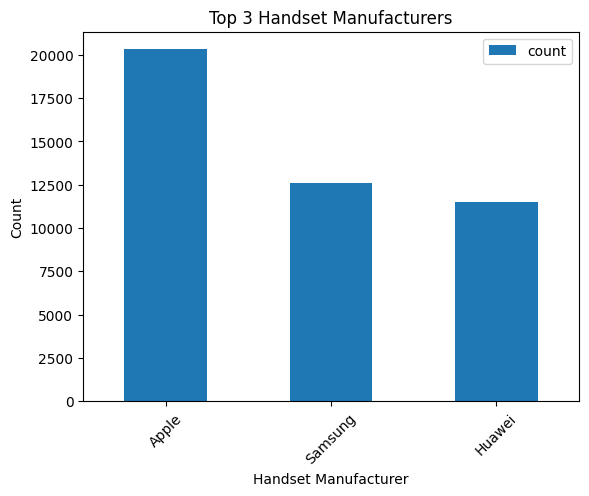

In [5]:
value_counts = df['Handset Manufacturer'].value_counts()[:3]
top_3_manufacturers = value_counts.index.tolist()

top_3_df = pd.DataFrame(value_counts)
top_3_df.plot(kind='bar', rot=45)

plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.title('Top 3 Handset Manufacturers')
plt.show()


Top 5 handsets per top 3 manufacturer

Handset Type
Apple iPhone 6 (A1586)     3216
Apple iPhone 6S (A1688)    2973
Apple iPhone 7 (A1778)     2365
Apple iPhone Se (A1723)    1711
Apple iPhone 8 (A1905)     1645
Name: count, dtype: int64


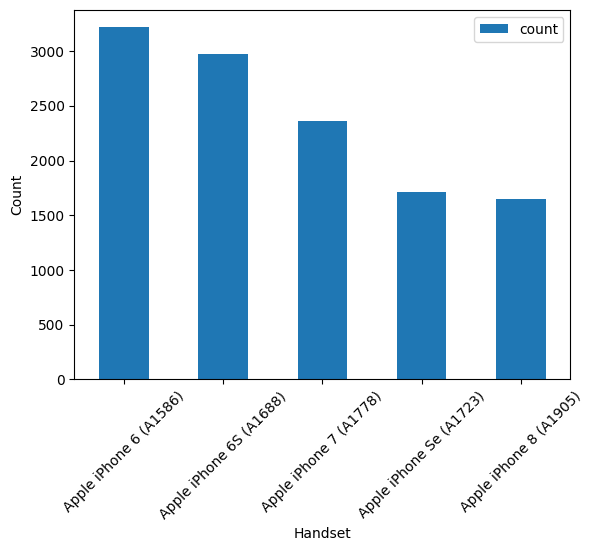

Handset Type
Samsung Galaxy S8 (Sm-G950F)    1378
Samsung Galaxy A5 Sm-A520F      1059
Samsung Galaxy J3 (Sm-J330)     1018
Samsung Galaxy S7 (Sm-G930X)     981
Samsung Galaxy J5 (Sm-J530)      916
Name: count, dtype: int64


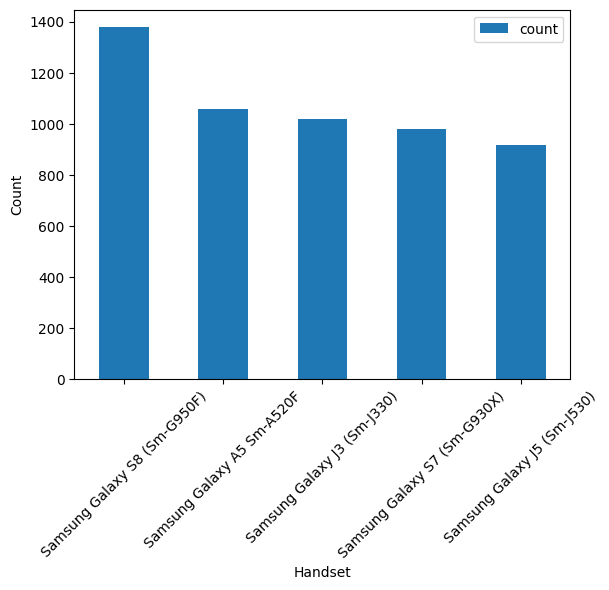

Handset Type
Huawei B528S-23A                  6634
Huawei E5180                       690
Huawei P20 Lite Huawei Nova 3E     602
Huawei P20                         418
Huawei Y6 2018                     311
Name: count, dtype: int64


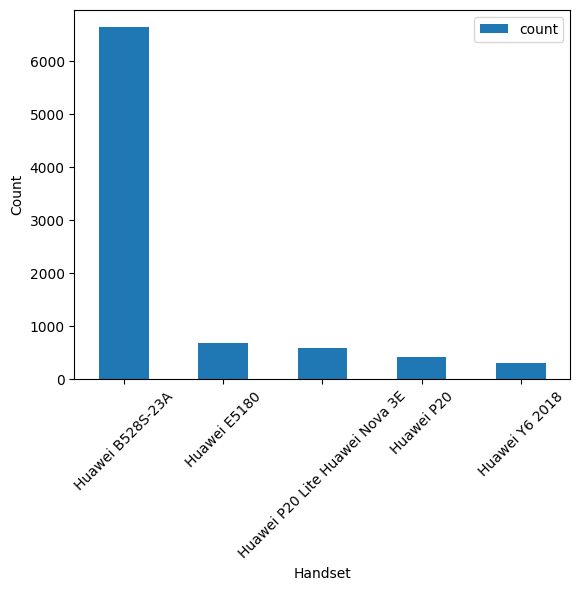

['Apple iPhone 6 (A1586)', 'Apple iPhone 6S (A1688)', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Samsung Galaxy S8 (Sm-G950F)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy S7 (Sm-G930X)', 'Samsung Galaxy J5 (Sm-J530)', 'Huawei B528S-23A', 'Huawei E5180', 'Huawei P20 Lite Huawei Nova 3E', 'Huawei P20', 'Huawei Y6 2018']


In [6]:
top_5_handsets = []
all_top_handsets = []
for manufacturer in top_3_manufacturers:
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    handset_counts = manufacturer_df['Handset Type'].value_counts()[:5]
    all_top_handsets.append(handset_counts)
    top_5_handsets.extend(handset_counts.index.tolist())
for top_handsets in all_top_handsets:
    print(top_handsets)
    top_handsets_df = pd.DataFrame(top_handsets)
    top_handsets_df.plot(kind='bar', rot=45)
    plt.xlabel('Handset')
    plt.ylabel('Count')
    plt.title('')
    plt.show()
    
print(top_5_handsets)



Number of xdr sessions

In [19]:

xdr_sessions_aggregate = df.groupby("MSISDN/Number").agg({"Google DL (Bytes)": "count", 
                                                            "Google UL (Bytes)":"count",
                                                            "Email DL (Bytes)": "count",
                                                            "Email UL (Bytes)": "count",
                                                            "Youtube DL (Bytes)": "count",
                                                            "Youtube UL (Bytes)": "count",
                                                            "Netflix DL (Bytes)": "count",
                                                            "Netflix UL (Bytes)": "count",
                                                            "Gaming DL (Bytes)": "count",
                                                            "Gaming UL (Bytes)": "count",
                                                            "Other DL (Bytes)": "count",
                                                            "Other UL (Bytes)": "count",
                                                            })

xdr_sessions_aggregate.head()


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


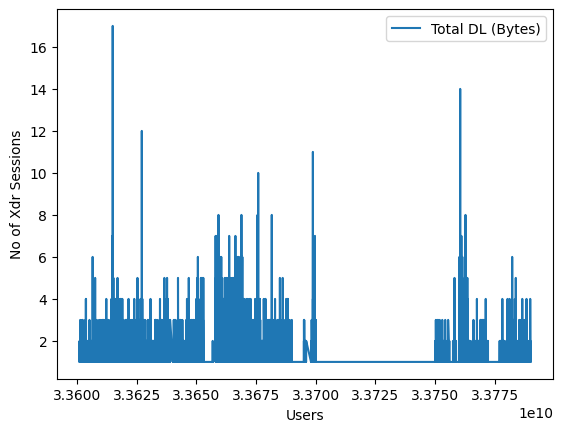

In [7]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "count"})
aggregated_data.head(10)
aggregated_data.plot()
plt.ylabel("No of Xdr Sessions")
plt.xlabel("Users")
plt.show()


Total DL per user

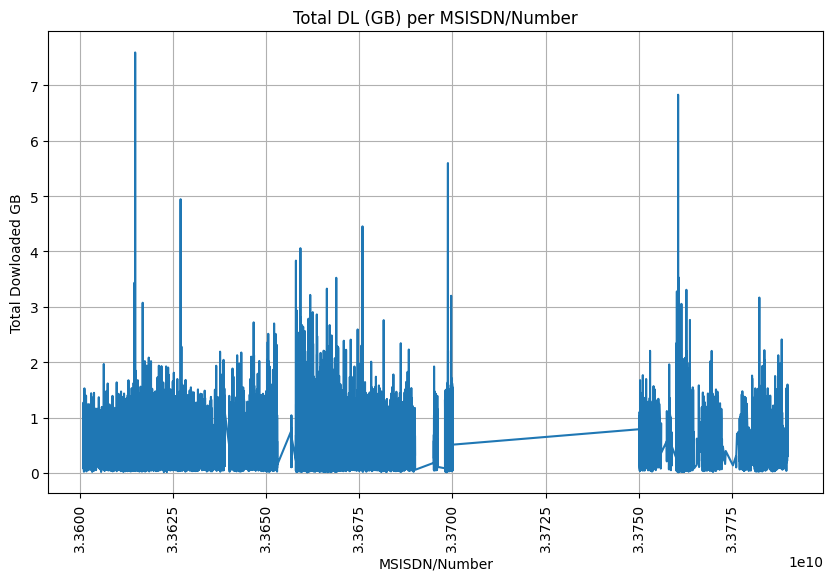

In [8]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total DL (Bytes)": "sum"})
aggregated_data['Total DL (GB)'] = aggregated_data['Total DL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total DL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Dowloaded GB')
plt.title('Total DL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Total UL per user

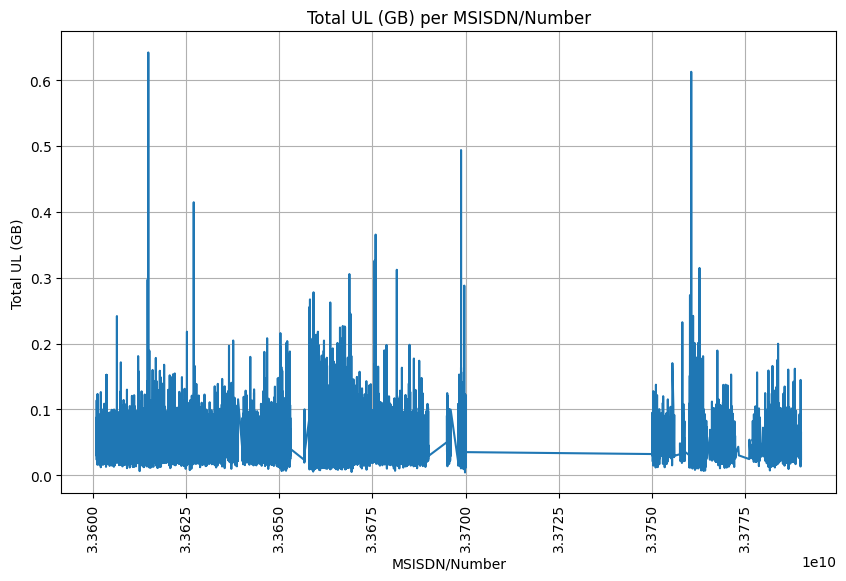

In [9]:
df.head()
aggregated_data = df.groupby("MSISDN/Number").agg({"Total UL (Bytes)": "sum"})
aggregated_data['Total UL (GB)'] = aggregated_data['Total UL (Bytes)'] / 1073741824
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data['Total UL (GB)'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total UL (GB)')
plt.title('Total UL (GB) per MSISDN/Number')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

User Engagement Task 3

In [10]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
